# A labor célja

A labor célja egy rövid bevezetőt adni a manapság oly népszerű "data science" Python eszközeibe.
A labor feladatai előtt mindenképp meg kell ismerkedni a Python nyelv alapjaival. A laborhoz tartozó rövid magyar Python bevezetőt [itt](https://github.com/juditacs/labor/blob/master/uzleti_intelligencia/Python_alapok.ipynb) találod.

A pandashoz egy rövid magyar bevezető [itt](https://github.com/juditacs/labor/blob/master/uzleti_intelligencia/Pandas_alapok.ipynb).

A labort összeállította: Ács Judit

# A labor menete

A labor elején együtt fogunk dolgozni az első feladatokon. A labor második részében önállóan kell megoldanotok a notebookban található kérdéseket. 5 feladat van, amelyek 5 kérdést tartalmaznak. A kérdések sorszámozva vannak és Q-val kezdődnek: Q1.1-Q5.5-ig. Néhány szorgalmi kérdés is van, ezekkel kiválthatók a hiányzó kérdések a kötelezők közül.

Egy feladat sikeres teljesítéséhez legalább 3 kérdésre kell helyesen válaszolni.

A laborhoz külön jegyzőkönyvet nem kell készíteni, ezt a notebookot kell vasárnap estig az AUT portálra feltölteni. A fájlrendszerben `uzleti_intelligencia.ipynb` néven megtaláljátok a notebookot abban a könyvtárban, ahonnan indítottátok a jupytert.

In [605]:
import pandas as pd  # konvenció szerint pd aliast használunk
%matplotlib inline
import matplotlib
import numpy as np

# tegyük szebbé a grafikonokat
matplotlib.style.use('ggplot')
#pd.set_option('display.mpl_style', 'default')
matplotlib.pyplot.rcParams['figure.figsize'] = (15, 3)
matplotlib.pyplot.rcParams['font.family'] = 'sans-serif'

A MovieLens adatsorral fogunk dolgozni, de először le kell töltenünk. http://grouplens.org/datasets/movielens/

Csak akkor töltjük le a fájlt, ha még nem létezik.

In [606]:
import os

if not os.path.exists('ml.zip'):
    import urllib
    u = urllib.request.URLopener()
    u.retrieve("http://files.grouplens.org/datasets/movielens/ml-100k.zip", "ml.zip")

Kicsomagoljuk egy shell commanddal

In [607]:
if not os.path.exists('ml-100k'):
    from zipfile import ZipFile
    with ZipFile('ml.zip') as myzip:
        myzip.extractall()

## Adat betöltése és normalizálása

A pd.read_table függvény táblázatos adatok betöltésére alkalmas. Több tucat paraméterrel [rendelkezik](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html), de csak egy kötelező paramétere van: a fájl, amit beolvasunk.
A karakterkódolást is meg kell adnunk, mert a fájl nem az alapértelmezett (utf-8) kódolást használja, hanem az ISO-8859-1-et, vagy köznéven a latin1-et.

In [608]:
# df = pd.read_table("ml-100k/u.item")  # UnicodeDecodeErrort kapunk, mert rossz dekódert használ
df = pd.read_table("ml-100k/u.item", encoding="latin1")
df.head()

,1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
0,2|GoldenEye (1995)|01-Jan-1995||http://us.imdb...
1,3|Four Rooms (1995)|01-Jan-1995||http://us.imd...
2,4|Get Shorty (1995)|01-Jan-1995||http://us.imd...
3,5|Copycat (1995)|01-Jan-1995||http://us.imdb.c...
4,6|Shanghai Triad (Yao a yao yao dao waipo qiao...


Ez még elég rosszul néz ki. Hogyan tudnánk javítani?
1. Rossz szeparátort használt a függvény (tab az alapértelmezett). A fájlban | a szeparátor. Ezt a `sep` paraméterrel tudjuk megadni.
1. A fájl első sora került az oszlopnevek helyére. Az oszlopok valódi nevei a README fájlból derülnek ki, amit kézzel megadhatjuk a read_table-nek a `names` paraméterben.
1. A read_table automatikusan generált egy id-t minden sornak, azonban az adatfájlban a filmek már rendelkeznek egy egyedi azonosítóval (movie_id), használjuk ezt a DataFrame indexeként (`index_col` paraméter). Célszerű szóköz nélküli, kisbetűs oszlopneveket használni, mert akkor attribútumként is elérjük őket (df.release_date).

In [609]:
column_names = [
    "movie_id", "title", "release_date", "video_release_date", "imdb_url", "unknown", "action", "adventure", "animation",
    "children", "comedy", "crime", "documentary", "drama", "fantasy", "film_noir", "horror", "musical", "mystery",
    "romance", "sci_fi", "thriller", "war", "western"]

In [610]:
df = pd.read_table("ml-100k/u.item", sep="|", names=column_names, encoding="latin1", index_col='movie_id')
df.head()

,title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,comedy,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Két oszlop is van, amik dátumot jelölnek: `release_date, video_release_date`. A pandas parszolni tudja a dátumokat többféle népszerű formátumban, ehhez csak a `parse_dates` paraméterben kell megadnunk a dátumot tartalmazó oszlopokat. Figyeljük meg, hogy ahol nincs dátum, az Nan (not a number)-ről NaT-ra változik.

In [611]:
df = pd.read_table("ml-100k/u.item", sep="|", names=column_names, encoding="latin1", parse_dates=[2,3], index_col='movie_id')
df.head()

,title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,comedy,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995-01-01,NaT,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),1995-01-01,NaT,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),1995-01-01,NaT,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),1995-01-01,NaT,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),1995-01-01,NaT,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Még mindig nem tökéletes, hiszen a filmek címei után szerepel az évszám zárójelben, ami egyrészt redundáns, másrészt zaj. Tüntessük el!

A szokásos `str` műveletek egy része elérhető DataSeries objektumokra is (minden elemre végrehajtja). A függvényeket az `str` névtérben találjuk.

In [612]:
df.title.str

Egy reguláris kifejezéssel eltüntetjük a két zárójel közti részt, majd eltávolítjuk az ott maradt whitespace-eket (a strip függvény a stringek elejéről és végéről is eltávolítja).
Végül adjuk értékül a régi title oszlopnak a kezdő és záró whitespace-ektől megfosztott változatát.

In [613]:
df.title = df.title.str.replace(r'\(.*\)', '').str.strip()

In [614]:
df.head()

,title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,comedy,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,1995-01-01,NaT,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye,1995-01-01,NaT,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms,1995-01-01,NaT,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty,1995-01-01,NaT,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat,1995-01-01,NaT,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


A `video_release_date` mező az első néhány sorban csak érvénytelen mezőket tartalmaz. Vajon igaz ez az egész DataFrame-re? Listázzuk ki azokat a mezőket, ahol nem NaT a video_release_date értéke, vagyis érvénytelen dátum.

In [615]:
df[df.video_release_date.notnull()]

,title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,comedy,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
movie_id,,,,,,,,,,,,,,,,,,,,,


Nincs ilyen mező, ezért elhagyhatjuk az oszlopot.

In [616]:
df = df.drop('video_release_date', axis=1)
df.head()

,title,release_date,imdb_url,unknown,action,adventure,animation,children,comedy,crime,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,1995-01-01,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye,1995-01-01,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms,1995-01-01,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty,1995-01-01,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Copycat,1995-01-01,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


## Adatok felszínes vizsgálata

Nézzük meg, hogy milyen információkat tudhatunk könnyedén meg a DataFrame-ről.

A `describe` függvény oszloponként szolgáltat alapvető infomációkkal: darabszám, átlag, szórás stb.
Mivel a legtöbb mező bináris, most nem tudunk meg sok hasznos információt a mezőkről.

In [617]:
df.describe()

,unknown,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
count,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,0.431034,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,0.495368,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 1. feladat: Egyszerű lekérdezések 

## Melyik filmek jelentek meg 1956-ban? 

In [618]:
df[df.release_date.dt.year == 1956]

,title,release_date,imdb_url,unknown,action,adventure,animation,children,comedy,crime,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
movie_id,,,,,,,,,,,,,,,,,,,,,
434,Forbidden Planet,1956-01-01,http://us.imdb.com/M/title-exact?Forbidden%20P...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
495,Around the World in 80 Days,1956-01-01,http://us.imdb.com/M/title-exact?Around%20the%...,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
614,Giant,1956-01-01,http://us.imdb.com/M/title-exact?Giant%20(1956),0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1577,Death in the Garden,1956-01-01,"http://us.imdb.com/Title?Mort+en+ce+jardin,+La...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Melyik filmek jelentek meg a 80-as években?

In [619]:
d = df[(df.release_date.dt.year >=  1980) & (df.release_date.dt.year < 1990)]
d.shape

(107, 22)

107 film jelent meg a 80-as években, ezt már nem praktikus kiíni. Nézzük meg csak az első 3-at.

In [620]:
d.head(3)

,title,release_date,imdb_url,unknown,action,adventure,animation,children,comedy,crime,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
movie_id,,,,,,,,,,,,,,,,,,,,,
89,Blade Runner,1982-01-01,http://us.imdb.com/M/title-exact?Blade%20Runne...,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
101,Heavy Metal,1981-03-08,http://us.imdb.com/M/title-exact?Heavy%20Metal...,0,1,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
144,Die Hard,1988-01-01,http://us.imdb.com/M/title-exact?Die%20Hard%20...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### A megjelenítési év legyen külön oszlop

Többször fogjuk még használni a megjelenési évet, ezért praktikus külön év oszlopot létrehozni.

A DateTime mezőhöz használható metódusok és attribútumok a dt névtérben vannak, így tudjuk minden oszlopra egyszerre meghívni. Az eredményt egy új oszlopban átroljuk.

In [621]:
df['year'] = df.release_date.dt.year

## Mikor jelentek meg a Die Hard filmek? 

In [622]:
df[df.title == 'Die Hard']

,title,release_date,imdb_url,unknown,action,adventure,animation,children,comedy,crime,...,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western,year
movie_id,,,,,,,,,,,,,,,,,,,,,
144,Die Hard,1988-01-01,http://us.imdb.com/M/title-exact?Die%20Hard%20...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1988


Sajnos csak teljes egyezésre tudunk így szűrni.

A szöveges mezőkre a pandas nyújt egy csomó műveletet, amik az str névtérben vannak (ahogy a dátum mezőkre a dt-ben voltak).

In [623]:
df[df.title.str.contains('Die Hard')]

,title,release_date,imdb_url,unknown,action,adventure,animation,children,comedy,crime,...,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western,year
movie_id,,,,,,,,,,,,,,,,,,,,,
144,Die Hard,1988-01-01,http://us.imdb.com/M/title-exact?Die%20Hard%20...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1988
226,Die Hard 2,1990-01-01,http://us.imdb.com/M/title-exact?Die%20Hard%20...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1990
550,Die Hard: With a Vengeance,1995-01-01,http://us.imdb.com/M/title-exact?Die%20Hard:%2...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995


A Die Hard 4 és 5 hiányzik. Kilógnának az adatsorból? Nézzük meg még egyszer, hogy mikori filmek szerepelnek.

In [624]:
df.release_date.describe()

count                    1681
unique                    240
top       1995-01-01 00:00:00
freq                      215
first     1922-01-01 00:00:00
last      1998-10-23 00:00:00
Name: release_date, dtype: object

A Die Hard 4 és 5 2007-ben, illetve 2013-ban jelentek meg, ezért nem szerepelnek az adatban.

## Több feltétel

A szűrési feltételeket tudjuk kombinálni az & és a | operátorokkal. Az operátorok a Boole algebra szerint működnek igazságértékekre:

In [625]:
print(True & False)
print(True | False | False)
print(True | False & False)

False
True
True


Az & precedenciája magasabb, mint a |-é. Mindkét operátor precedenciája magasabb, mint az összehasonlító operátoroké (==, <, >), ezért mindig zárójelezzünk!

### Melyik filmek tartoznak egyszerre az akció és romantikus kategóriába?

In [626]:
d = df[(df.action==1) & (df.romance==1)]
print(len(d))
d.head()

25


,title,release_date,imdb_url,unknown,action,adventure,animation,children,comedy,crime,...,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western,year
movie_id,,,,,,,,,,,,,,,,,,,,,
33,Desperado,1995-01-01,http://us.imdb.com/M/title-exact?Desperado%20(...,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1995
50,Star Wars,1977-01-01,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,1,0,0,0,0,...,0,0,0,0,1,1,0,1,0,1977
68,"Crow, The",1994-01-01,"http://us.imdb.com/M/title-exact?Crow,%20The%2...",0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1994
92,True Romance,1993-01-01,http://us.imdb.com/M/title-exact?True%20Romanc...,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1993
161,Top Gun,1986-01-01,http://us.imdb.com/M/title-exact?Top%20Gun%20(...,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1986


### Melyik filmek tartoznak az akció VAGY a romantikus kategóriába?

Itt a Boole vagyra gondolunk.

In [627]:
d = df[(df.action==1) | (df.romance==1)]
print(len(d))
d.head()

473


,title,release_date,imdb_url,unknown,action,adventure,animation,children,comedy,crime,...,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western,year
movie_id,,,,,,,,,,,,,,,,,,,,,
2,GoldenEye,1995-01-01,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
4,Get Shorty,1995-01-01,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
14,"Postino, Il",1994-01-01,"http://us.imdb.com/M/title-exact?Postino,%20Il...",0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1994
16,French Twist,1995-01-01,http://us.imdb.com/M/title-exact?Gazon%20maudi...,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1995
17,From Dusk Till Dawn,1996-02-05,http://us.imdb.com/M/title-exact?From%20Dusk%2...,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1996


## Q1.1. Hány akciófilm jelent meg 1985 előtt, illetve 1985-ben vagy később?

## Q1.2. Létezik-e gyerekeknek szóló thriller? Ha igen, melyek azok?

## Q1.3. Hány filmnek hosszabb a címe, mint 30 karakter?

## Rendezés

A DataFrame-eket rendezésére gazdag eszköztárat kínál a pandas. A legegyszerűbb rendezés az index szerinti:

In [631]:
df.sort_index().head()

,title,release_date,imdb_url,unknown,action,adventure,animation,children,comedy,crime,...,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western,year
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,1995-01-01,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
2,GoldenEye,1995-01-01,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,Four Rooms,1995-01-01,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
4,Get Shorty,1995-01-01,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
5,Copycat,1995-01-01,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995


Bármelyik oszlop szerint is rendezhetünk:

In [632]:
print(df.sort_values('title').title.head())
print(df.sort_values('title').title.tail())

movie_id
1300    'Til There Was You
1353                 1-900
225         101 Dalmatians
178           12 Angry Men
330                    187
Name: title, dtype: object
movie_id
1188                     Young Guns II
547     Young Poisoner's Handbook, The
1164                  Zeus and Roxanne
267                            unknown
1633                    Á köldum klaka
Name: title, dtype: object


## Q1.4. Melyik a legrégebbi és a legújabb film?

## Q1.5. Melyik a legrégebbi és a legújabb horrorfilm?

# 2. feladat: Csoportosítás és vizualizáció

## Hány filmet adtak ki évente?

A kérdést két lépésben tudjuk megválaszolni:

1. csoportosítás évenként
2. összesítés 1-1 évre


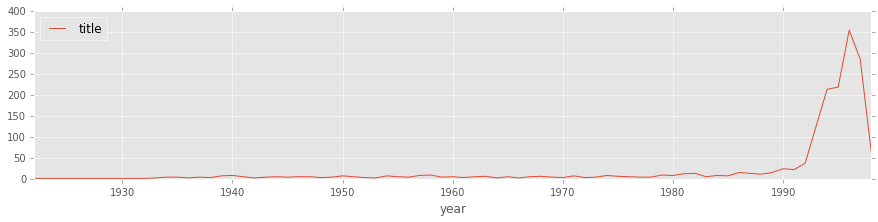

In [637]:
df.groupby('year').count().plot(y='title')

Vonaldiagram az alapértelmezett, de oszlopdiagramként informatívabb lenne.

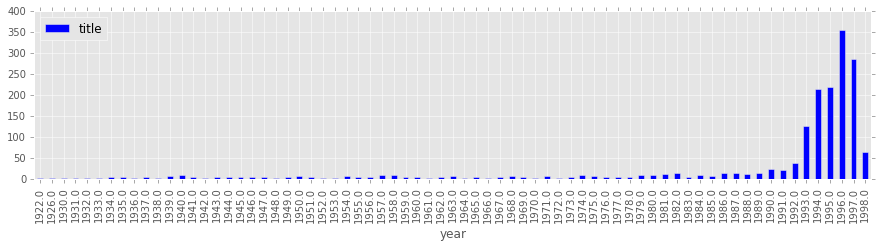

In [638]:
df.groupby('year').count().plot(y='title', kind='bar')

Lásztik, hogy a 80-as évek végén nőtt meg a kiadott filmek száma, kicsit közelítsünk rá. Ehhez először szűrni fogjuk a 1985 utáni filmeket, majd csoportosítva ábrázolni.

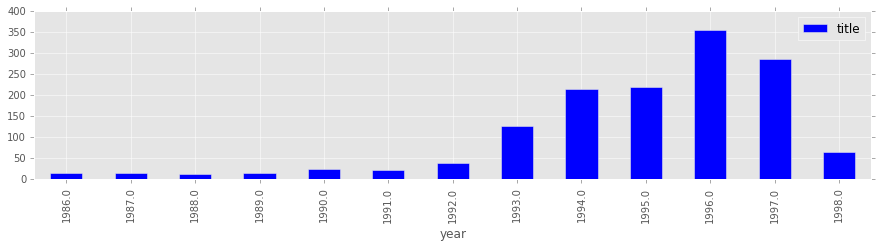

In [639]:
d = df[df.year > 1985]
d.groupby('year').count().plot(y='title', kind='bar')
# df[df.year > 1985].groupby('year').count().plot(y='title', kind='bar')  # vagy egy sorban

## Groupby tetszőleges feltétel szerint

Nem csak egy kategóriaértékű oszlop szerint csoportosíthatunk, hanem tetszőleges kifejezés szerint. Ezt kihasználva fogunk évtizedenként csoportosítani. A groupby-nak bármilyen kifejezést megadhatunk, ami diszkrét értékekre képezi le a sorokat, tehát véges sok csoport egyikébe helyezi (mint egy hash függvény).

Az évtizedet úgy kaphatjuk meg, ha az évet 10-zel osztjuk és csak az egészrészt tartjuk meg, hiszen 1983/10 és 1984/10 egészrésze ugyanúgy 198. Használjuk a Python egészosztás operátorát (//).

In [640]:
d = df.groupby(df.year // 10)
d.groups.keys()  # létrejött csoportok listázása

dict_keys([192.0, 193.0, 194.0, 195.0, 196.0, 197.0, 198.0, 199.0])

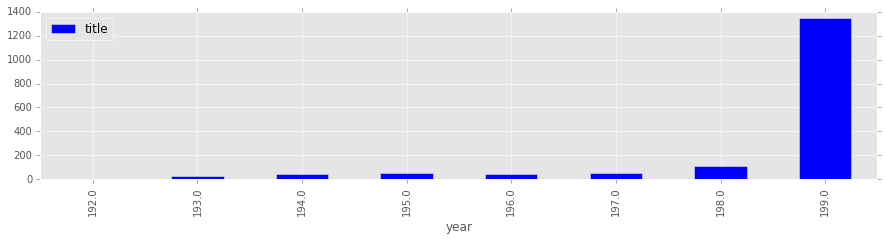

In [641]:
d.count().plot(y='title', kind='bar')

## Q2.1. Hány vígjátékot (comedy) adtak ki évente?

## Gyerekfilmet vagy krimit adnak ki többet évtizedenként?

In [643]:
col1 = 'children'
col2 = 'crime'
d = df[['year', col1, col2]].copy()
d['diff'] = d[col1] - d[col2]
d.groupby(d.year // 10).sum()  #.plot(y='diff', kind='bar')

,year,children,crime,diff
year,,,,
192,3848,0,0,0
193,56142,3,2,1
194,87486,5,4,1
195,105558,6,2,4
196,84475,8,2,6
197,104668,7,4,3
198,212384,4,3,1
199,2689597,89,92,-3


A 90-es években több filmet adtak ki, mint előtte összesen, nézzük meg azt az évtizedet közelebbről!

## Q2.2. Mennyivel adtak ki több gyerekfilmet, mint krimit évente a 90-es években? Ábrázold.

## Q2.3. Melyik műfajból hányat adtak ki? 

Az évnek nyilván nincs értelme.
Messze drámából volt a legtöbb.

## Q2.4. Melyik műfajból volt a legtöbb a 90-es években?

## Q2.5. Ábrázold a kiadási hónapok eloszlását egy tortadiagramon!

# 3. feladat: pd.merge

Az adathalmazhoz lényegi része a 100000 értékelés, amit az u.data fájlból tudunk beolvasni. A README-ből kiolvashatjuk a fájl oszlopait.

In [648]:
cols = ['user', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-100k/u.data', names=cols)

In [649]:
ratings.head()

,user,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


A timestamp oszlop Unix timestampeket tartalmaz, konvertáljuk DateTime-má.

In [650]:
ratings['timestamp'] = pd.to_datetime(ratings.timestamp, unit='s')
ratings.head()

,user,movie_id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


## Merge a film táblával

Mivel már több DataFrame-mel dolgozunk, érdemes a filmeket tartalmazó táblának beszédesebb nevet adni.

In [651]:
movies = df

A pd.merge függvény képes mindenféle join műveletre. Ennek is rengeteg paramétere van, de most csak néhány alapvető művelettel fogunk megismerkedni.

A merge-nek van egy bal és egy jobb DataFrame-je, ami most legyen a ratings, illetve a movies. A ratings DataFrame-ben a movie_id oszlophoz kell megkeresni a movies DataFrame megfelelő indexű sorát. A merge megkülönbözteti azt, hogy index vagy nem index oszlop mentén egyesít:
1. a left_on/right_on paraméterrel adhatjuk meg azt a bal/jobboldali nem index oszlopot, ami mentén merge-ölünk,
2. a left_index/right_index=True flaggel jelezhetjük, ha index mentén akarunk merge-ölni.

In [652]:
r = pd.merge(ratings, movies, left_on='movie_id', right_index=True)

Meghívhatjuk a baloldali DataFrame metódusaként is:

In [653]:
r = ratings.merge(movies, left_on=['movie_id'], right_index=True)

Csak néhány oszlop érdekel minket a movies DataFrame-ből:

In [654]:
r = ratings.merge(movies[['title', 'year', 'release_date']], left_on=['movie_id'], right_index=True)

## Hány értékelés érkezett a film megjelenése előtt?

In [655]:
len(r[r.timestamp <= r.release_date])

231

## Hogy oszlik meg ez a szám a filmek között? 

In [656]:
r[r.timestamp <= r.release_date].title.value_counts()

Apt Pupil                          160
Desperate Measures                  21
Phantoms                             4
Hard Rain                            4
Dangerous Beauty                     4
Fallen                               4
Firestorm                            3
Prophecy II, The                     3
Four Days in September               3
Leading Man, The                     3
Magic Hour, The                      3
Mighty, The                          3
Half Baked                           2
Shooting Fish                        2
Wag the Dog                          2
Hurricane Streets                    2
Duoluo tianshi                       2
Sliding Doors                        1
I Know What You Did Last Summer      1
Star Kid                             1
Oscar & Lucinda                      1
Truman Show, The                     1
Deep Rising                          1
Name: title, dtype: int64

In [657]:
movies[movies.title == 'Apt Pupil']

,title,release_date,imdb_url,unknown,action,adventure,animation,children,comedy,crime,...,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western,year
movie_id,,,,,,,,,,,,,,,,,,,,,
315,Apt Pupil,1998-10-23,http://us.imdb.com/Title?Apt+Pupil+(1998),0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1998


## Q3.1. Csoportosítsd a filmeket értékelés szerint és ábrázold hisztogramon az egyes értékeléseket kapott filmek számát!

## Q3.2. Csoportosítsd a thrillereket értékelés szerint és ábrázold hisztogramon az egyes értékeléseket kapott filmek számát!

Vigyázat: az előzőleg merge-ölt táblázat nem tartalmaz műfaji információkat.

## Q3.3. Mi az értékelések átlaga évtizedenként (film megjelenési éve)? 

## Q3.4. Az értékelésekhez tartozik egy timestamp. Mi az értékelések átlaga hónapokra bontva?

Tehát melyik hónapban jószívűbbek az emberek?

## Q3.5. Melyik hónapban legnagyobb a gyerekfilmek értékeléseinek szórása? 

# 4. feladat: Users DataFrame

## Q4.1 Olvasd be a u.user fájlt egy users DataFrame-be!

Segítségképpen az oszlopok: user_id, age, gender, occupation, zip

## Q4.2. Milyen arányban értékeltek a különböző foglalkozású emberek? Ábrázold egy tortadiagramon!

A plot függvénynek most pie típust kell átadnunk. Érdemes a grafikon méretét beállítani, különben furcsán torz diagramot kapunk (figsize=(10,10)).


## Q4.3. Kik hány értékelést adtak?

## Q4.4. Milyen átlagos értékelést adnak az egyes szakmák képviselői?

## Hisztogram készítése az egyes értékelésekről

Hisztogram készítésére (melyik érték hányszor szerepelt), a hist függvény áll rendelkezésünkre:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7b3a88710>]], dtype=object)

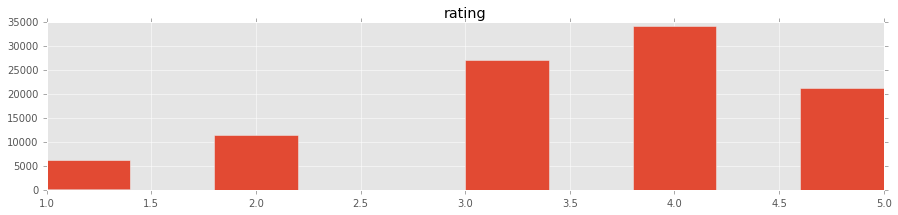

In [667]:
ratings.hist('rating')

## Q4.5. Készíts hisztogramot az értékelési kedvről! Hány user adott le N értékelést?

Segítség: készítened egy DataFrame-et, amiben szerepel melyik user hányszor értékelt.

## Q4.6. (Szorgalmi) Milyen volt a nemek eloszlása a romantikus filmet, illetve az akciófilmeket értékelők között? Készíts két tortadiagramot!

# 5. feladat: K legközelebbi szomszéd

Ebben a feladatban a műfajok alapján fogjuk megkeresni minden filmhez a hozzá leghasonlóbb K filmet. Az eljárás neve k-nearest neighbor (KNN). A scikit-learn tartalmaz több KNN implementációt is, mi most a ball_tree-t fogjuk használni. Az osztály dokumentációja itt található: http://scikit-learn.org/stable/modules/neighbors.html

## Q5.1. Nyerd ki a movies adattáblából a műfaji címkéket mátrixként!

A DataFrame as_matrix függvényével készíthetünk mátrixot a DataFrame-ből. Az as_matrixnak megadható, hogy melyik oszlopok kerüljenek bele a mátrixba. Most csak a műfajokat tartalmazó oszlopokat kell megtartani. Vigyázz, az utolsó oszlop az évet tartalmazza!

A mátrix neve legyen X.

## Q5.2. Futtasd le a KNN-t az X mátrixon!

Ehhez bele kell nézned a NearestNeighbors [dokumentációjába](http://scikit-learn.org/stable/modules/neighbors.html).

Az indexeket az indices változóban tárold.

A legközelebbi szomszédok számát a K változóban tárold.

Az indices változó tartalmazza az indexeket, ebből készítsünk DataFrame-et:

In [674]:
ind = pd.DataFrame(indices)
ind.head()

,0,1,2,3
0,421,0,258,399
1,1,1313,981,116
2,2,52,78,127
3,64,46,73,33
4,4,99,328,331


Értelmezzük a táblázatot!
Az index oszlop (első oszlop) azt mondja meg, hogy az X mátrix hányadik sorához tartozó szomszédok találhatók meg a sorban. A 0-3. nevű oszlopok a legközelebbi szomszédokat adják meg. Legtöbb film esetén saját maga a legközelebbi szomszédja, hiszen 0 a távolságuk, azonban nincs mindenhol így. Mit gondolsz, miért?

A táblázat indexe 0-val kezdődik, de a movies táblában a movie_id 1-től indul. Kézzel meg lehet adni egy DataFrame indexét:

In [675]:
ind_head = ind.head()
ind_head.index = [4, 5, 6, 7, 8]
ind_head

,0,1,2,3
4,421,0,258,399
5,1,1313,981,116
6,2,52,78,127
7,64,46,73,33
8,4,99,328,331


## Q5.3. Állítsd át az ind DataFrame indexét úgy, hogy 1-től indexeljen!

Segítség: a Python alapok [Számsorozatok](http://github.com/juditacs/labor/tree/master/uzleti_intelligencia/Python_alapok.ipynb#Sz%C3%A1msorozatok) részét érdemes megnézni.

### Többi cella növelése

Mivel a KNN a szomszédokat is 0-tól indexeli, az összes mező eggyel kisebb, mint kellene. Növeljük meg mindegyiket! Szerencsére a pandas túlterheli a + operátort pont úgy, ahogy várnánk:

In [677]:
ind = ind + 1
ind.head()

,0,1,2,3
1,422,1,259,400
2,2,1314,982,117
3,3,53,79,128
4,65,47,74,34
5,5,100,329,332


## Q5.4. Keresd meg az indexekhez tartozó filmcímeket!

Itt több merge-re lesz szükségünk, K db szomszéd címeit kell megkeresnünk. Hány merge hívás kell?

Segítség: a merge-ölések sorozatát meg lehet oldani egy 4 soros rekurzív függvénnyel.

## Q5.5. Jelenjen meg a táblázatban az a film is, aminek a szomszédjai a sorban vannak! A címeken kívül más oszlopa ne legyen a táblázatnak!

Most olyanok a soraink, hogy: movie_id | nearest1 | nearest 2 stb.

A movie_id mellett jó lenne az eredeti címet is látni.

## Q5.6. (Szorgalmi) Mik a Die Hardhoz leghasonlóbb filmek?

# Visszajelzés

Köszönöm, hogy végigcsináltad a labort, remélem, hogy hasznosnak találtad.

Minden vissajelzés fontos és be fogom építeni következő alkalmakba. Kérlek töltsd ki ezt a rövid ezt a rövid [kérdőívet](https://docs.google.com/forms/d/1QKKR_qsP0850H0lY_aGPHXnN2YnJgKMvkH37uNGtQ9s/viewform).

# Folytatás

Ha kedvet kaptál a témához, érdemes megnézni a [kaggle.com](https://www.kaggle.com/) data science oldalt, ahol megnézheted mások kódját, részt vehetsz versenyeken és sokat tanulhatsz a témáról.